In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.metrics import (classification_report, confusion_matrix, 
                             mean_squared_error, mean_absolute_error, r2_score, 
                             explained_variance_score, median_absolute_error)
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier, 
                              GradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [2]:
df = pd.read_csv('..\\Datos\\final_df.csv')

# Descriptive analysis

In [3]:
df.describe()

,tmed,prec,tmin,tmax,dir,velmedia,racha,hrMedia,hrMax,hrMin,count,mosquito,dayofyear
count,1461.000000,1461.000000,1461.000000,1461.000000,1150.000000,1152.000000,1150.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,18.072621,1.028884,14.990554,21.153457,24.195652,3.550087,9.425478,74.895277,87.726215,59.809035,8.314853,0.756331,183.125257
std,5.697615,4.309804,5.907211,5.648320,22.109605,1.517320,3.261139,12.143293,7.516579,15.013960,31.993377,0.429442,105.474746
min,4.900000,0.000000,2.000000,7.400000,1.000000,0.800000,3.600000,19.000000,46.000000,8.000000,0.000000,0.000000,1.000000
25%,13.200000,0.000000,10.100000,16.200000,10.000000,2.500000,6.900000,67.000000,86.000000,49.000000,1.000000,1.000000,92.000000
50%,17.600000,0.000000,14.500000,20.800000,21.000000,3.300000,8.900000,77.000000,91.000000,60.000000,2.000000,1.000000,183.000000
75%,23.000000,0.000000,20.300000,26.000000,27.000000,4.400000,11.100000,85.000000,93.000000,71.000000,5.000000,1.000000,274.000000
max,30.400000,55.900000,27.200000,35.200000,99.000000,11.900000,23.600000,93.000000,96.000000,91.000000,464.000000,1.000000,366.000000


array([[<Axes: title={'center': 'tmed'}>,
        <Axes: title={'center': 'prec'}>,
        <Axes: title={'center': 'tmin'}>,
        <Axes: title={'center': 'tmax'}>],
       [<Axes: title={'center': 'dir'}>,
        <Axes: title={'center': 'velmedia'}>,
        <Axes: title={'center': 'racha'}>,
        <Axes: title={'center': 'hrMedia'}>],
       [<Axes: title={'center': 'hrMax'}>,
        <Axes: title={'center': 'hrMin'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mosquito'}>],
       [<Axes: title={'center': 'dayofyear'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

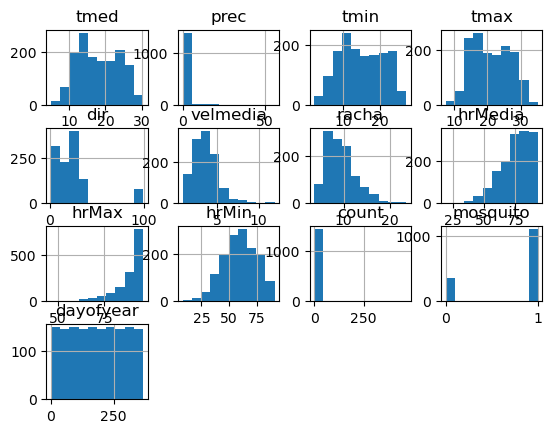

In [4]:
# We do histograms for all variables

df.hist()

<Axes: >

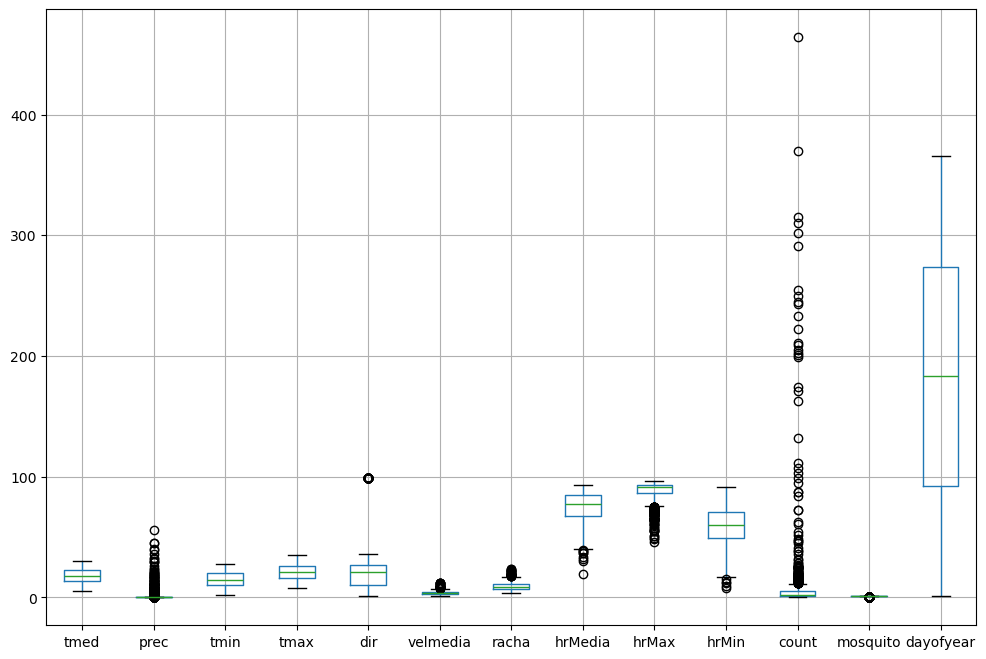

In [5]:
# We do boxplots for all  variables

plt.figure(figsize=(12, 8))

df.boxplot()

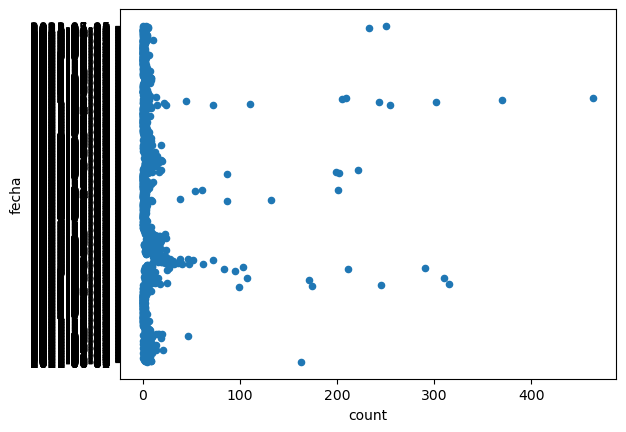

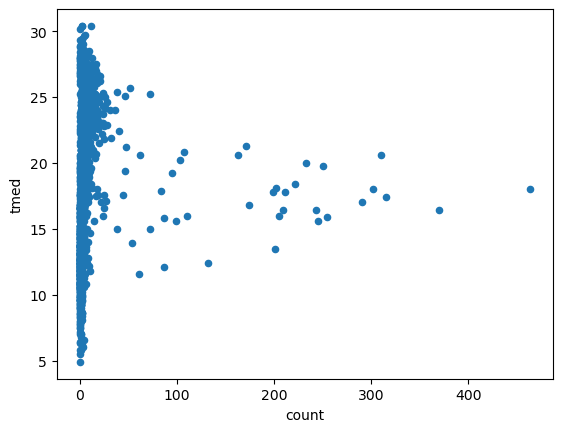

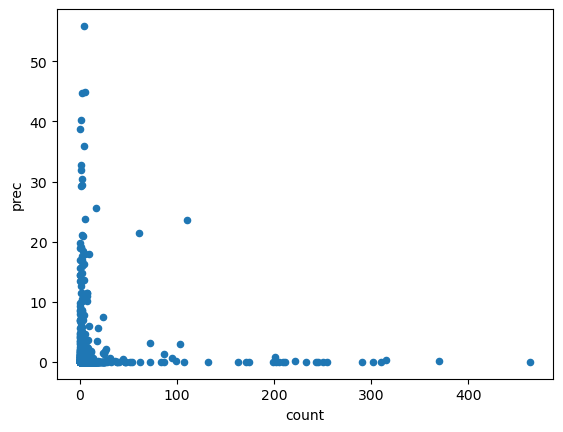

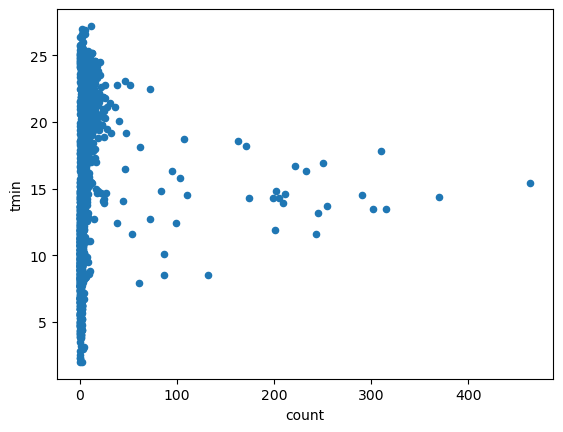

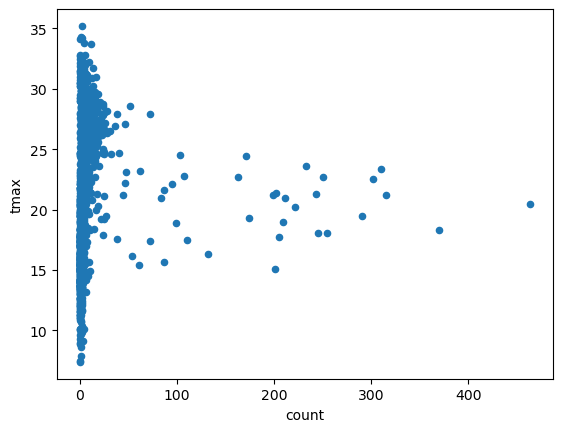

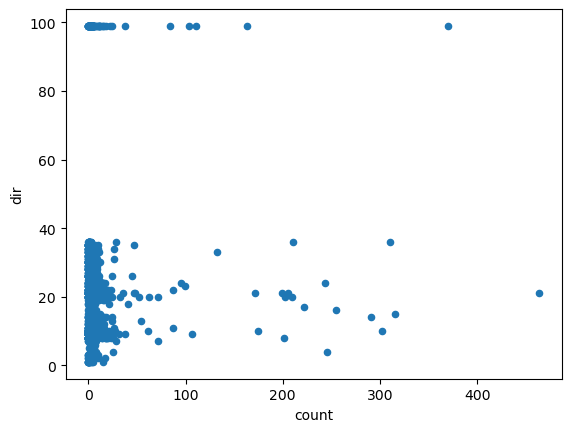

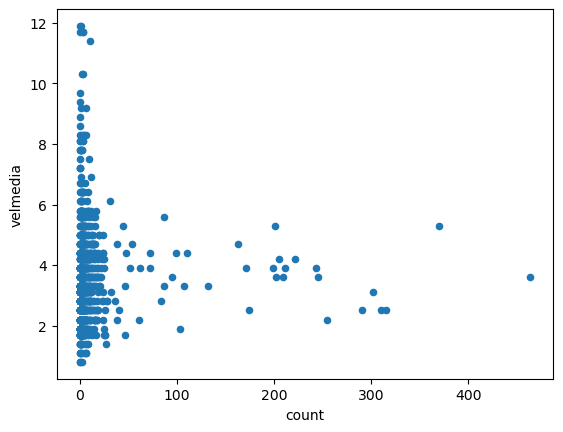

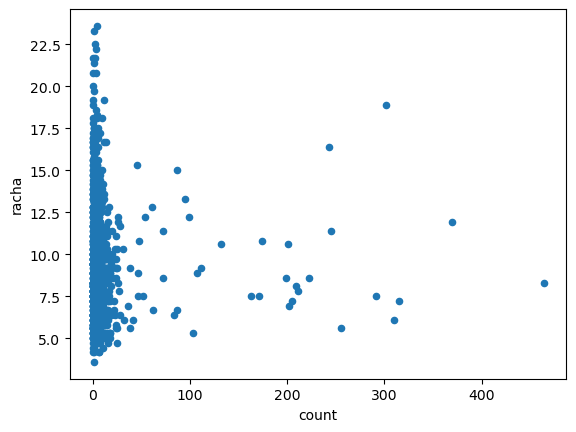

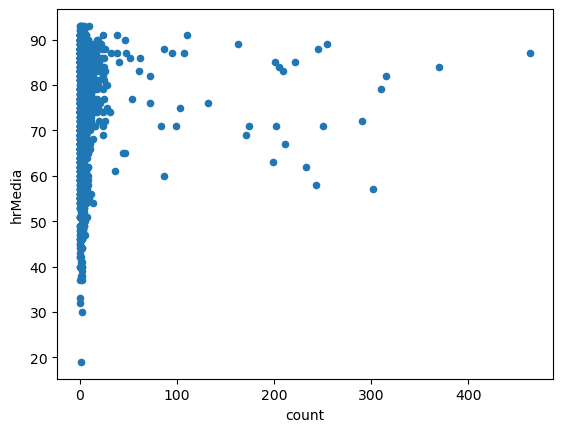

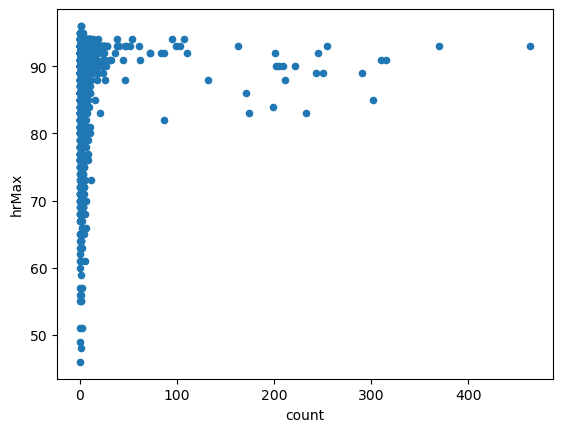

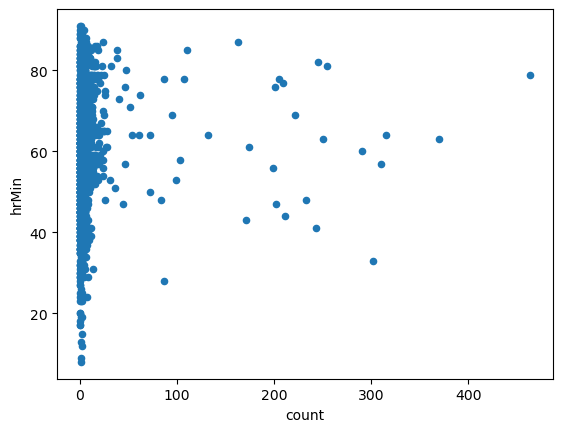

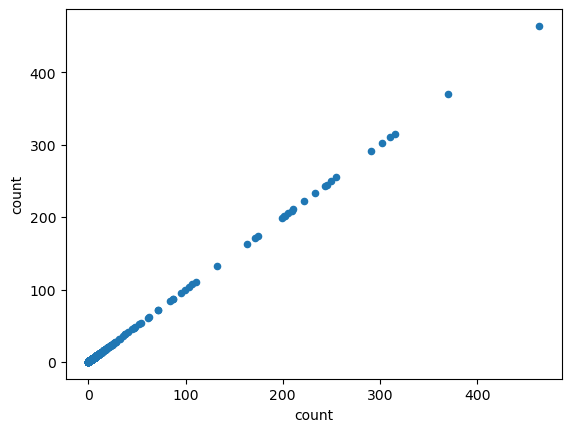

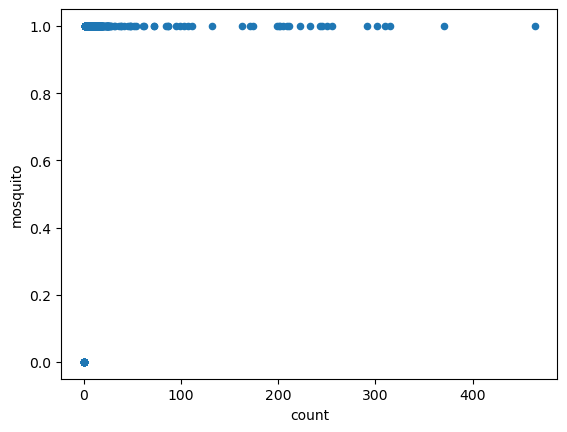

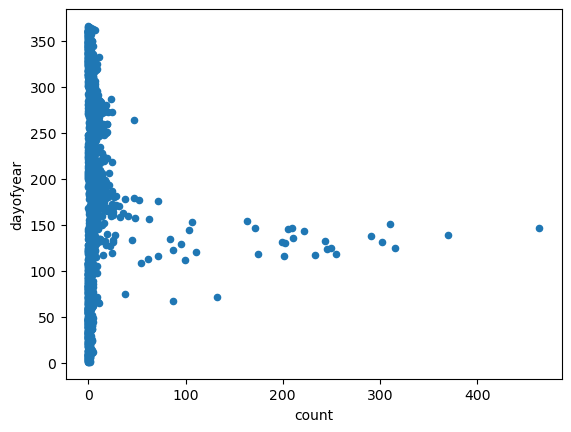

In [6]:
# We use scatter plots to see the relationship between count and all other variables
for column in df.columns:
    df.plot.scatter(x='count', y=column)


In [7]:
# We check for normality with the shapiro-wilk test
# we import the shapiro-wilk test
from scipy.stats import shapiro

for column in df.columns:  
    if df[column].dtype != 'float64':
        continue
    stat, p = shapiro(df[column])
    print(f"Column: {column}, Statistic: {stat}, p-value: {p}")


Column: tmed, Statistic: 0.965067412080748, p-value: 2.7385072732834615e-18
Column: prec, Statistic: 0.25473603612920404, p-value: 2.717536760022667e-60
Column: tmin, Statistic: 0.9669348543431237, p-value: 9.091251043765892e-18
Column: tmax, Statistic: 0.9719025751241065, p-value: 2.8496102152778254e-16
Column: dir, Statistic: nan, p-value: nan
Column: velmedia, Statistic: nan, p-value: nan
Column: racha, Statistic: nan, p-value: nan
Column: hrMedia, Statistic: 0.9399530053930496, p-value: 7.260035273590365e-24
Column: hrMax, Statistic: 0.761564640906789, p-value: 1.1517059056228339e-41
Column: hrMin, Statistic: 0.9871300123621376, p-value: 4.3187075663481617e-10
Column: count, Statistic: 0.22136895615147612, p-value: 4.440723144757068e-61


None of the variable seem normal

In [8]:
# We compare the statistics between the groups formed by the two values od the mosquito variable
df.groupby('mosquito').describe()

tmed                                                        \
           count       mean       std  min     25%   50%     75%   max   
mosquito                                                                 
0          356.0  14.190730  4.796789  4.9  11.275  13.0  15.925  30.2   
1         1105.0  19.323258  5.395124  5.8  14.600  19.6  24.000  30.4   

            prec            ... count        dayofyear              \
           count      mean  ...   75%    max     count        mean   
mosquito                    ...                                      
0          356.0  0.848596  ...   0.0    0.0     356.0  158.132022   
1         1105.0  1.086968  ...   7.0  464.0    1105.0  191.177376   

                                                        
                 std  min    25%    50%     75%    max  
mosquito                                                
0         131.215840  1.0   45.0   95.5  317.25  366.0  
1          94.390278  1.0  120.0  193.0  268.00  365.0  

[2 rows x 96 columns]

In [9]:
# we check if there are significant differences between the two groups

for column in df.columns:
    if df[column].dtype != 'float64':
        continue
    
    group_0 = df[df['mosquito'] == 0][column]
    group_1 = df[df['mosquito'] == 1][column]
    
    t_stat, p_value = mannwhitneyu(group_0, group_1)
    
    print(f"U-test for column: {column}")
    print(f"U-statistic: {t_stat}, P-value: {p_value}")
    print("-" * 50)


U-test for column: tmed
U-statistic: 91802.0, P-value: 7.434419380123758e-52
--------------------------------------------------
U-test for column: prec
U-statistic: 201344.0, P-value: 0.3618337517584155
--------------------------------------------------
U-test for column: tmin
U-statistic: 93413.0, P-value: 2.5054486704964835e-50
--------------------------------------------------
U-test for column: tmax
U-statistic: 93780.0, P-value: 5.534867354089972e-50
--------------------------------------------------
U-test for column: dir
U-statistic: nan, P-value: nan
--------------------------------------------------
U-test for column: velmedia
U-statistic: nan, P-value: nan
--------------------------------------------------
U-test for column: racha
U-statistic: nan, P-value: nan
--------------------------------------------------
U-test for column: hrMedia
U-statistic: 168295.5, P-value: 4.074507653354122e-05
--------------------------------------------------
U-test for column: hrMax
U-statisti

Significant differences found between the days with mosquitos and without them in all variables except for precipitation

In [10]:
# In order to be able to use the wind related variables in machine learning, we need to fill the missing values

df['velmedia'].fillna(0, inplace=True)
df['racha'].fillna(0, inplace=True)
df['dir'].fillna(0, inplace=True)

# Adding the delay column

In [11]:
# The adult mosquitoes will appear days after the optimal weather conditions, so we have to add a delay to the count and mosquito columns
# We should try different delays to find the optimal one
delay_df = df.drop(['count', 'mosquito'], axis=1)


In [12]:
# Searching the best delay for count
sumas_abs = []

for n in range(26, -26, -1):
    # Create shifted column count_delay
    delay_df['count_delay'] = df['count'].shift(n)
    
    # Calculate the correlation matrix
    corr_matrix = delay_df.corr(method='spearman', numeric_only=True)
    
    # Get the sum of the absolute values ​​of the column 'count_delay'
    print(f'{n}:{corr_matrix["count_delay"].abs().sum()}')
    
    # We save the sum in the list
    sumas_abs.append(corr_matrix['count_delay'].abs().sum())

# Find the value of n that gives the largest sum
# Find the value of n that gives the largest sum
n_index_max =  sumas_abs.index(max(sumas_abs))
n_max =  26 - n_index_max

print(f"The value of n that produces the largest sum is: {n_max}, {sumas_abs[n_index_max]}")

26:3.6439823106213534
25:3.7108196705382315
24:3.734967164160027
23:3.7625420057961043
22:3.766999535172684
21:3.7296393259199165
20:3.7712012156789076
19:3.7811357889399293
18:3.750518370511842
17:3.7025397130242803
16:3.7526211707191304
15:3.7477016520300457
14:3.7736412696339587
13:3.8242609989621794
12:3.8577571116871767
11:3.848743979166009
10:3.8294178154928042
9:3.8254499703724067
8:3.795125639033831
7:3.8343281173436154
6:3.7805909240020843
5:3.762406803104038
4:3.8068973694677015
3:3.847958988950839
2:3.8291674677511875
1:3.8086259578079287
0:3.8373109232185367
-1:3.837700195473154
-2:3.749594544411094
-3:3.7490087801383316
-4:3.744844783344442
-5:3.6570249464853695
-6:3.7085723871269294
-7:3.7253250472639245
-8:3.6186512300253226
-9:3.5249166386518747
-10:3.570648290232835
-11:3.51653159532622
-12:3.5654218248431375
-13:3.574016837767405
-14:3.609163824547589
-15:3.606555322669587
-16:3.5888906354311363
-17:3.5597419403025605
-18:3.533028786215645
-19:3.4490992282918773
-20:3

In [ ]:
# Searching the best delay for mosquito
sumas_abs = []

for n in range(26, -26, -1):
    # Create shifted column count_delay
    delay_df['count_delay'] = df['mosquito'].shift(n)
    
    # Calculate the correlation matrix
    corr_matrix = delay_df.corr(method='spearman', numeric_only=True)
    
    # Get the sum of the absolute values ​​of the column 'count_delay'
    print(f'{n}:{corr_matrix["count_delay"].abs().sum()}')
    
    # We save the sum in the list
    sumas_abs.append(corr_matrix['count_delay'].abs().sum())

# Find the value of n that gives the largest sum
# Find the value of n that gives the largest sum
n_index_max =  sumas_abs.index(max(sumas_abs))
n_max =  26 - n_index_max

print(f"The value of n that produces the largest sum is: {n_max}, {sumas_abs[n_index_max]}")

26:2.821276358309002
25:2.8438135602793686
24:2.8287963352536747
23:2.866398014663108
22:2.8592161950838313
21:2.780847957086487
20:2.858134372835152
19:2.881554229890325
18:2.903876863692138
17:2.8873986717711233
16:2.89697045442019
15:2.957347344926224
14:2.9434516525334127
13:2.945393022291692
12:3.0394129678502315
11:3.0677777530376487
10:2.99236721798845
9:2.9979800035162256
8:2.967237484880612
7:3.001462513766688
6:2.9996129473812774
5:2.909578763598203
4:2.9587415568037603
3:3.0013741137029264
2:2.966192717302617
1:3.006567708287612
0:3.083509484440567
-1:3.099788051398282
-2:2.9903473575706365
-3:3.0496003150458204
-4:3.0094017163023685
-5:2.954862078474827
-6:3.027188218785847
-7:2.993082622854623
-8:2.8685170551815315
-9:2.734366464701109
-10:2.8627151458203763
-11:2.894119185449876
-12:2.9092481754577673
-13:2.919979167941798
-14:2.977298690932913
-15:2.979390722160591
-16:3.0227887770761557
-17:2.9908939533468146
-18:2.946570259839369
-19:2.8632443905694682
-20:2.7824910405

# Checking the correlations

In [13]:
# We delay the count and mosquito columns by 1 day
df['count_delay'] = df['count'].shift(12)
df['mosquito_delay'] = df['mosquito'].shift(-1)

heatmap = df.corr(method='spearman')
heatmap = heatmap.round(2)
heatmap.style.background_gradient(cmap='coolwarm', axis=None)

C:\Users\javie\AppData\Local\Temp\ipykernel_15668\2614430404.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = df.corr(method='spearman')


,tmed,prec,tmin,tmax,dir,velmedia,racha,hrMedia,hrMax,hrMin,count,mosquito,dayofyear,count_delay,mosquito_delay
tmed,1.000000,-0.040000,0.990000,0.980000,-0.100000,0.100000,-0.010000,0.100000,0.060000,0.110000,0.530000,0.400000,0.340000,0.520000,0.390000
prec,-0.040000,1.000000,-0.010000,-0.080000,-0.070000,0.070000,0.170000,0.200000,0.250000,0.170000,-0.030000,-0.020000,0.010000,0.000000,0.000000
tmin,0.990000,-0.010000,1.000000,0.940000,-0.100000,0.130000,0.010000,0.180000,0.110000,0.210000,0.530000,0.390000,0.330000,0.520000,0.390000
tmax,0.980000,-0.080000,0.940000,1.000000,-0.090000,0.060000,-0.040000,0.020000,0.000000,0.010000,0.520000,0.390000,0.350000,0.500000,0.380000
dir,-0.100000,-0.070000,-0.100000,-0.090000,1.000000,0.460000,0.510000,0.140000,0.270000,0.090000,0.120000,0.120000,0.030000,0.140000,0.080000
velmedia,0.100000,0.070000,0.130000,0.060000,0.460000,1.000000,0.820000,0.310000,0.400000,0.210000,0.250000,0.180000,-0.050000,0.250000,0.180000
racha,-0.010000,0.170000,0.010000,-0.040000,0.510000,0.820000,1.000000,0.200000,0.360000,0.100000,0.160000,0.110000,-0.020000,0.200000,0.140000
hrMedia,0.100000,0.200000,0.180000,0.020000,0.140000,0.310000,0.200000,1.000000,0.770000,0.870000,0.190000,0.110000,0.010000,0.160000,0.140000
hrMax,0.060000,0.250000,0.110000,0.000000,0.270000,0.400000,0.360000,0.770000,1.000000,0.600000,0.190000,0.120000,-0.060000,0.180000,0.150000
hrMin,0.110000,0.170000,0.210000,0.010000,0.090000,0.210000,0.100000,0.870000,0.600000,1.000000,0.180000,0.110000,0.080000,0.170000,0.120000


Several colums have covariation

In [14]:
# We drop the columns with high covariation
df = df.drop(['tmin', 'tmax', 'hrMin', 'hrMax'], axis=1)

In [15]:
delay_df = df.drop(['count', 'mosquito', 'count_delay', 'mosquito_delay'], axis=1)

In [16]:
# Searching the best delay for count
sumas_abs = []

for n in range(26, -26, -1):
    # Create shifted column count_delay
    delay_df['count_delay'] = df['count'].shift(n)
    
    # Calculate the correlation matrix
    corr_matrix = delay_df.corr(method='spearman', numeric_only=True)
    
    # Get the sum of the absolute values ​​of the column 'count_delay'
    print(f'{n}:{corr_matrix["count_delay"].abs().sum()}')
    
    # We save the sum in the list
    sumas_abs.append(corr_matrix['count_delay'].abs().sum())

# Find the value of n that gives the largest sum
n_index_max =  sumas_abs.index(max(sumas_abs))
n_max =  26 - n_index_max

print(f"The value of n that produces the largest sum is: {n_max}, {sumas_abs[n_index_max]}")

26:2.4227726128147866
25:2.445707738706277
24:2.4841344518987563
23:2.4839561012335403
22:2.495594774669196
21:2.4529288479696048
20:2.4735494808250085
19:2.497018589026919
18:2.4830243756071906
17:2.4468414214715173
16:2.4628906599267424
15:2.4450676511555796
14:2.4663657611545187
13:2.4760282022787266
12:2.4814072106759704
11:2.45919371204202
10:2.4275848862510285
9:2.414785673846228
8:2.4275465842647663
7:2.446828714530698
6:2.399095703530295
5:2.347655029567469
4:2.351166639426533
3:2.390922211512825
2:2.3943143157607434
1:2.4063130865741726
0:2.4161431766792476
-1:2.3813975580313267
-2:2.314878556841809
-3:2.342664977021623
-4:2.3330641919771926
-5:2.2741198535350966
-6:2.327338859262479
-7:2.348605967652124
-8:2.2745523621366384
-9:2.239141725428923
-10:2.2915481634590815
-11:2.2346245652407926
-12:2.2883945239647647
-13:2.2861077472295963
-14:2.278277017530455
-15:2.311597587590869
-16:2.2844545334879993
-17:2.2748325690294298
-18:2.2584026259317143
-19:2.208879157932711
-20:2.1

In [17]:
# Searching the best delay for mosquito
sumas_abs = []

for n in range(26, -26, -1):
    # Create shifted column count_delay
    delay_df['count_delay'] = df['mosquito'].shift(n)
    
    # Calculate the correlation matrix
    corr_matrix = delay_df.corr(method='spearman', numeric_only=True)
    
    # Get the sum of the absolute values ​​of the column 'count_delay'
    print(f'{n}:{corr_matrix["count_delay"].abs().sum()}')
    
    # We save the sum in the list
    sumas_abs.append(corr_matrix['count_delay'].abs().sum())

# Find the value of n that gives the largest sum
n_index_max =  sumas_abs.index(max(sumas_abs))
n_max =  26 - n_index_max

print(f"The value of n that produces the largest sum is: {n_max}, {sumas_abs[n_index_max]}")

26:1.985191414456744
25:2.0196387491667536
24:2.0459602671481467
23:2.0469298677936987
22:2.0302633353630677
21:1.970795040667169
20:2.0288796879079727
19:2.058883378852627
18:2.0482273740189676
17:2.032455147910109
16:2.0212255526536795
15:2.056600246553899
14:2.064503435507669
13:2.0367656084017134
12:2.0735949608146833
11:2.1026560938987875
10:2.0443610993679115
9:2.0223695928818355
8:2.077488661297206
7:2.0672807905412443
6:2.052111094632343
5:1.955323768675667
4:1.9618286157825018
3:2.0107343848939907
2:2.005228097834685
1:2.027522333883682
0:2.076907898158284
-1:2.053034219098026
-2:1.974679598807647
-3:2.0674189814951833
-4:2.0258674390304
-5:1.9470019452244935
-6:2.0300598063798123
-7:2.0194812366669597
-8:1.943923562906786
-9:1.8724268972863334
-10:1.986981528039887
-11:1.9607159950247843
-12:1.9665157884469784
-13:1.9829397700730707
-14:1.9939668213225312
-15:2.007979556723331
-16:2.030685944939327
-17:2.023589965574131
-18:1.9858423226356083
-19:1.9554099086440824
-20:1.8991

In [18]:
df['count_delay'] = df['count'].shift(19)
df['mosquito_delay'] = df['mosquito'].shift(11)

In [19]:
outliers_df = df[df['count_delay'] < 60]

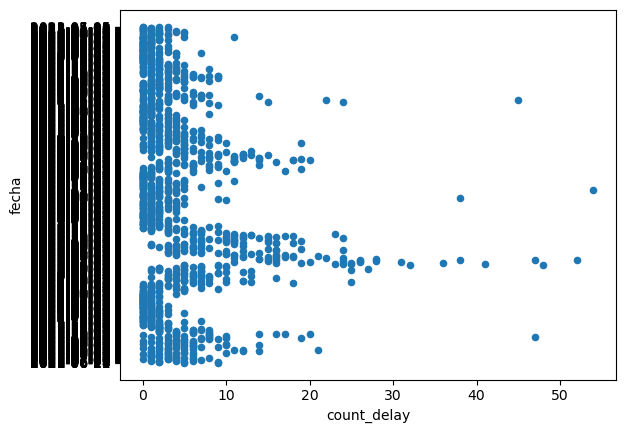

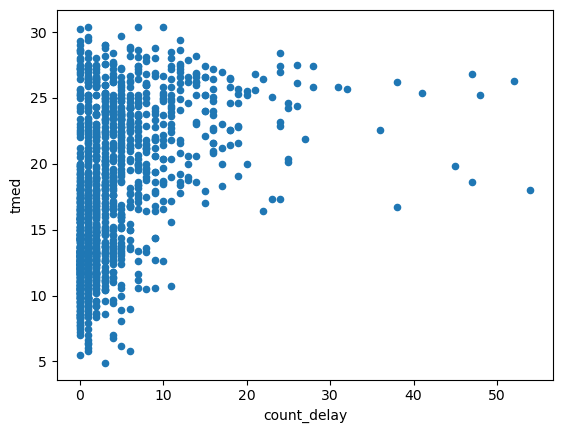

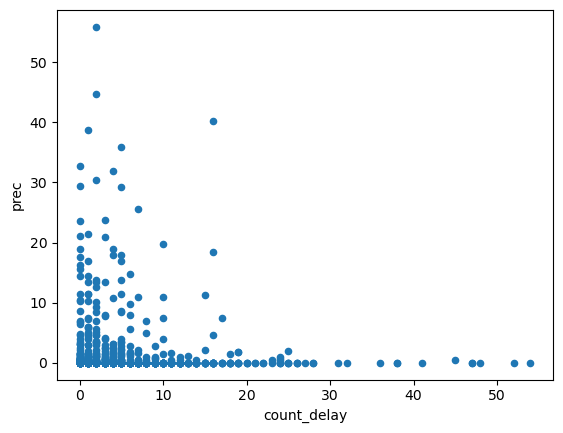

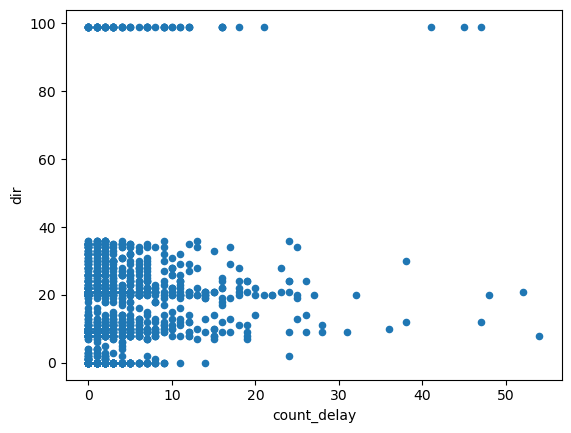

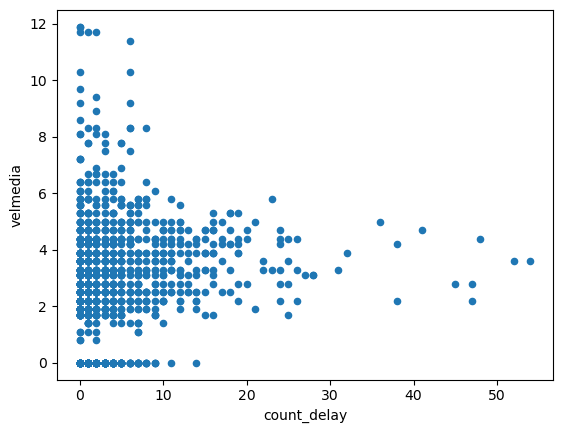

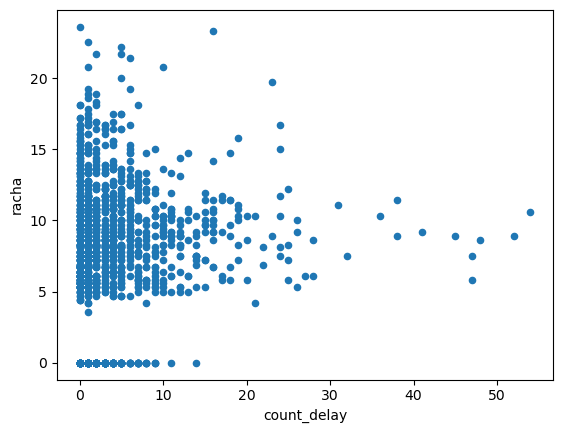

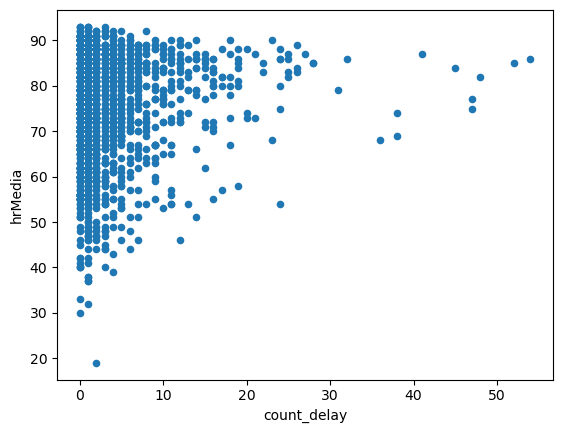

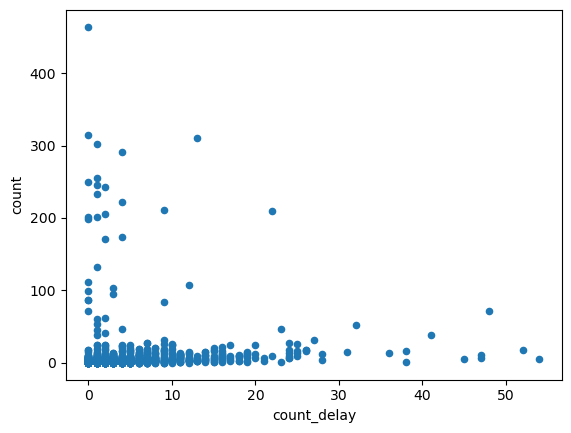

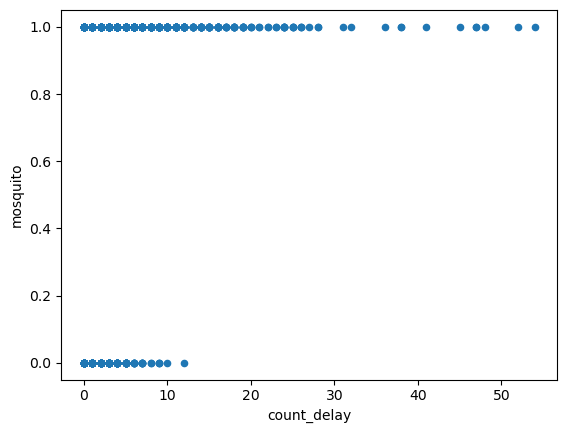

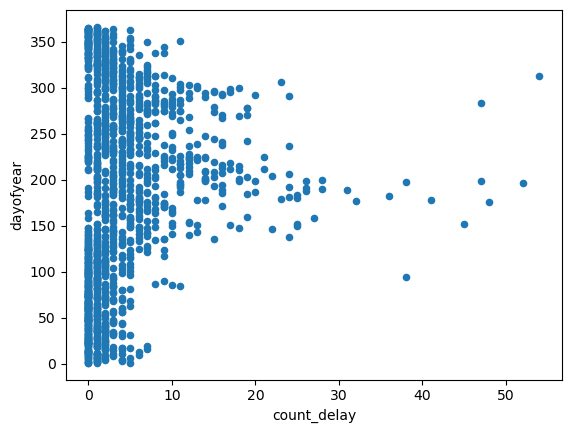

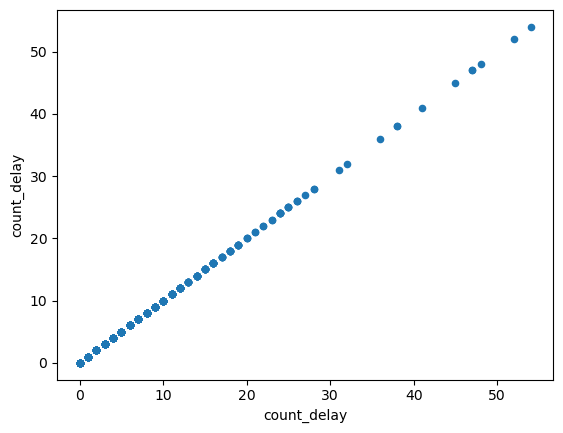

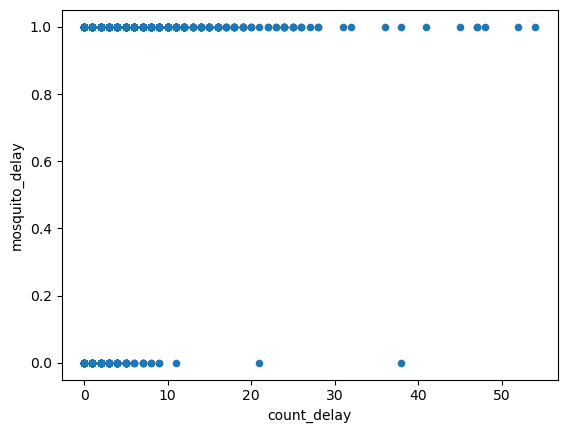

In [20]:
# We use scatter plots to see the relationship between count and all other variables
for column in df.columns:
    outliers_df.plot.scatter(x='count_delay', y=column)

In [21]:
df

,fecha,tmed,prec,dir,velmedia,racha,hrMedia,count,mosquito,dayofyear,count_delay,mosquito_delay
0,2021-06-02,20.4,0.0,99.0,3.6,6.7,87.0,5.0,1,153,NaN,NaN
1,2021-06-03,20.6,0.0,99.0,4.7,7.5,89.0,163.0,1,154,NaN,NaN
2,2021-06-04,20.5,0.0,8.0,5.3,9.2,90.0,9.0,1,155,NaN,NaN
3,2021-06-05,20.6,0.7,99.0,2.5,6.7,80.0,9.0,1,156,NaN,NaN
4,2021-06-06,21.5,0.0,22.0,4.4,15.0,72.0,2.0,1,157,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2023-05-01,18.8,0.0,0.0,0.0,0.0,73.0,2.0,1,121,1.0,1.0
1457,2023-05-02,18.4,0.0,0.0,0.0,0.0,66.0,6.0,1,122,3.0,1.0
1458,2023-05-03,19.3,0.0,0.0,0.0,0.0,70.0,0.0,0,123,2.0,0.0
1459,2023-05-04,19.2,0.0,0.0,0.0,0.0,72.0,4.0,1,124,0.0,0.0


# Machine learning

In [ ]:
# We drop the unnecesary rows to prepare the data for ML
df.dropna(inplace=True)
df.drop(['fecha', 'count', 'mosquito'], axis=1, inplace=True)

In [23]:
df

,tmed,prec,dir,velmedia,racha,hrMedia,dayofyear,count_delay,mosquito_delay
19,24.8,0.0,21.0,5.8,11.1,64.0,172,5.0,1.0
20,23.0,0.0,13.0,3.3,6.7,80.0,173,163.0,1.0
21,21.8,1.0,32.0,3.1,10.8,64.0,174,9.0,1.0
22,21.9,0.0,99.0,3.6,6.7,63.0,175,9.0,1.0
23,22.0,0.0,20.0,5.6,12.5,82.0,176,2.0,1.0
...,...,...,...,...,...,...,...,...,...
1456,18.8,0.0,0.0,0.0,0.0,73.0,121,1.0,1.0
1457,18.4,0.0,0.0,0.0,0.0,66.0,122,3.0,1.0
1458,19.3,0.0,0.0,0.0,0.0,70.0,123,2.0,0.0
1459,19.2,0.0,0.0,0.0,0.0,72.0,124,0.0,0.0


In [24]:
# We normalize the data

X = df.drop(['mosquito_delay', 'count_delay' ],    axis=1)  
y = df[['mosquito_delay', 'count_delay' ]]

scaler = StandardScaler()

X_normalizado = scaler.fit_transform(X)

X_normalizado = pd.DataFrame(X_normalizado, columns=X.columns)

df = pd.concat([X_normalizado, y], axis=1)

In [25]:
df.dropna(inplace=True)

## Mosquito prediction

In [26]:
# We use a linear regression to predict the number of mosquitos

# Split the data into training and test sets
X = df.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df['mosquito_delay']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train) 

# Make predictions on the test set
y_pred = model.predict(X_test)


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives

# Total number of samples
total = cm.sum()

# Calculate the percentages
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100

# Print the results in percentage
print(f"True Positives (TP): {TP_percent:.2f}%")
print(f"False Positives (FP): {FP_percent:.2f}%")
print(f"True Negatives (TN): {TN_percent:.2f}%")
print(f"False Negatives (FN): {FN_percent:.2f}%")

pred = model.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))


True Positives (TP): 74.44%
False Positives (FP): 13.76%
True Negatives (TN): 6.18%
False Negatives (FN): 5.62%
              precision    recall  f1-score   support

         0.0       0.52      0.31      0.39        71
         1.0       0.84      0.93      0.88       285

    accuracy                           0.81       356
   macro avg       0.68      0.62      0.64       356
weighted avg       0.78      0.81      0.79       356



In [38]:
# We run the linear regression 1000 times and get the average of the metrics

# Variables para almacenar las métricas
TP_percent_list = []
FP_percent_list = []
TN_percent_list = []
FN_percent_list = []

# Repetir el proceso 1000 veces
for i in range(10000):
    # Dividir el conjunto de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Entrenar el modelo
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    
    # Predecir los valores en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Extraer los valores de la matriz de confusión
    TP = cm[1, 1]  # True Positives
    FP = cm[0, 1]  # False Positives
    TN = cm[0, 0]  # True Negatives
    FN = cm[1, 0]  # False Negatives
    
    # Calcular el total de muestras
    total = cm.sum()
    
    # Calcular los porcentajes
    TP_percent = (TP / total) * 100
    FP_percent = (FP / total) * 100
    TN_percent = (TN / total) * 100
    FN_percent = (FN / total) * 100
    
    # Almacenar los resultados
    TP_percent_list.append(TP_percent)
    FP_percent_list.append(FP_percent)
    TN_percent_list.append(TN_percent)
    FN_percent_list.append(FN_percent)

# Calcular la media de cada métrica
mean_TP = np.mean(TP_percent_list)
mean_FP = np.mean(FP_percent_list)
mean_TN = np.mean(TN_percent_list)
mean_FN = np.mean(FN_percent_list)

# Imprimir la media de los resultados
print(f"Media True Positives (TP): {mean_TP:.2f}%")
print(f"Media False Positives (FP): {mean_FP:.2f}%")
print(f"Media True Negatives (TN): {mean_TN:.2f}%")
print(f"Media False Negatives (FN): {mean_FN:.2f}%")

# También puedes imprimir el reporte de clasificación promedio, pero este es más complejo.
# Aquí hay un ejemplo de cómo podrías hacerlo:
avg_report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report Promedio:")
for label, metrics in avg_report.items():
    if label != 'accuracy':  # 'accuracy' no es una clase, así que lo omitimos
        print(f"{label}: {metrics}")


Media True Positives (TP): 71.18%
Media False Positives (FP): 19.30%
Media True Negatives (TN): 4.86%
Media False Negatives (FN): 4.66%

Classification Report Promedio:
0.0: {'precision': 0.5238095238095238, 'recall': 0.275, 'f1-score': 0.36065573770491804, 'support': 80.0}
1.0: {'precision': 0.8152866242038217, 'recall': 0.927536231884058, 'f1-score': 0.8677966101694915, 'support': 276.0}
macro avg: {'precision': 0.6695480740066728, 'recall': 0.601268115942029, 'f1-score': 0.6142261739372048, 'support': 356.0}
weighted avg: {'precision': 0.7497861522051031, 'recall': 0.7808988764044944, 'f1-score': 0.7538323691662167, 'support': 356.0}


In [39]:
# We are going to predict 2024

df_original = pd.read_csv('..\\Datos\\final_df.csv')

#we do join by the index but only add the date column
df_mixto = pd.merge(df, df_original[['fecha']], left_index=True, right_index=True)

df_mixto['fecha'] = pd.to_datetime(df_mixto['fecha'], errors='coerce')

df_2024 = df_mixto[df_mixto['fecha'].dt.year == 2024]


X_2024 = df_2024.drop(columns=['count_delay','mosquito_delay', 'fecha'])  
y_2024 = df_2024['mosquito_delay']  


y_pred_2024 = model.predict(X_2024)

df_comparison = pd.DataFrame({
    'date': df_2024['fecha'],       
    'real_values': y_2024,            
    'predicted_values': y_pred_2024   
})

print(df_comparison.head())

# we export the dataframe to a csv file
df_comparison.to_csv('..\\Datos\\df_comparison.csv', index=False)

          date  real_values  predicted_values
634 2024-01-01          0.0               0.0
635 2024-01-02          0.0               1.0
636 2024-01-03          1.0               1.0
637 2024-01-04          0.0               1.0
638 2024-01-05          0.0               0.0


In [ ]:
df_comparison

With linear regression many methods were tried but not included in the code for brevity as none of them improve the results. These include:
Balancing: Oversampling and smote
Normalicing
Ensemble methods: Bagging, Adaboost, Stacking

In [29]:
# We use a random forest to predict the precense of mosquitos

# We split the data into training and test sets


X = df.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df['mosquito_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# We train the model
model = RandomForestClassifier()
model.fit(X_train, y_train) 

# We make predictions on the test set
y_pred = model.predict(X_test)

# We make predictions on the test set
y_pred = model.predict(X_test)

# We calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score
medae = median_absolute_error(y_test, y_pred)  # Median Absolute Error

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print all metrics
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Explained Variance Score:", evs)
print("Median Absolute Error:", medae)
print("Adjusted R²:", adjusted_r2)

print('RandomForestClassifier')


MSE: 0.2443820224719101
MAE: 0.2443820224719101
R²: -0.37849385793128
RMSE: 0.4943501011144937
MAPE: inf
Explained Variance Score: -0.3460477123019403
Median Absolute Error: 0.0
Adjusted R²: -0.4062221826597827
RandomForestClassifier


c:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Count prediction

### Outliers treatment

In [30]:
# We need to deal with the outliers since some have extreme values. Previous trials have shown that the models are not performing well

threshold = 100

# Wereate a mask to identify outliers
outlier_mask = df['count_delay'] > threshold

# We apply a rolling mean to the outliers
# We set window size to 2 (previous + next day), but you can change it to a larger window
df.loc[outlier_mask, 'count_delay'] = df['count_delay'].rolling(window=5, min_periods=1).mean()

In [31]:
print(df['count_delay'].value_counts().sort_index().to_string())

0.0      341
1.0      257
2.0      165
3.0      123
4.0       96
5.0       86
6.0       58
7.0       46
8.0       31
9.0       27
10.0      22
11.0      22
12.0      18
13.0       8
14.0      12
15.0      10
16.0      13
17.0       5
18.0       7
19.0       7
20.0       3
21.0       2
22.0       2
22.6       1
23.0       2
24.0       6
25.0       4
26.0       3
27.0       1
28.0       2
28.8       1
31.0       1
32.0       1
36.0       1
36.6       1
37.8       1
38.0       2
41.0       1
42.4       1
42.8       1
45.0       1
47.0       2
48.0       1
49.2       1
51.0       1
52.0       1
54.0       1
54.2       1
61.0       1
61.2       1
62.0       1
66.4       1
66.6       1
70.2       1
72.0       2
76.4       1
81.6       1
83.6       1
84.0       2
87.0       2
88.6       1
95.0       1
95.4       1
99.0       1
110.6      1
113.6      1
118.6      1
175.8      1


In [32]:
# We use a random forest to predict the presence of mosquitos

# We split the data into training and test sets

X = df.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df['count_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# We train the model
model = RandomForestRegressor()
model.fit(X_train, y_train) 

# We make predictions on the test set
y_pred = model.predict(X_test)

# We calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score
medae = median_absolute_error(y_test, y_pred)  # Median Absolute Error

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print all metrics
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Explained Variance Score:", evs)
print("Median Absolute Error:", medae)
print("Adjusted R²:", adjusted_r2)

print('Random forest regressor')

MSE: 173.87067644943824
MAE: 5.609382022471911
R²: 0.08818859329004791
RMSE: 13.186003050562299
MAPE: inf
Explained Variance Score: 0.08833027961758366
Median Absolute Error: 2.231
Adjusted R²: 0.06984755924703168
Random forest regressor


c:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
# We use a decision tree to predict the number of mosquitos

# We split the data into training and test sets

X = df.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df['count_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# We train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

# We make predictions on the test set
y_pred = model.predict(X_test)

# We make predictions on the test set
y_pred = model.predict(X_test)

# We calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score
medae = median_absolute_error(y_test, y_pred)  # Median Absolute Error

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print all metrics
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Explained Variance Score:", evs)
print("Median Absolute Error:", medae)
print("Adjusted R²:", adjusted_r2)

print('DecisionTreeregressor')


MSE: 298.42044943820224
MAE: 7.015730337078652
R²: -0.2806395913314754
RMSE: 17.27485020016678
MAPE: inf
Explained Variance Score: -0.2763288889504223
Median Absolute Error: 2.0
Adjusted R²: -0.30639958311113147
DecisionTreeregressor


c:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
# We use a support vector machine to predict the number of mosquitos

# We split the data into training and test sets

X = df.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df['count_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# We train the model
model = SVR()
model.fit(X_train, y_train) 

# We make predictions on the test set
y_pred = model.predict(X_test)


# We calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score
medae = median_absolute_error(y_test, y_pred)  # Median Absolute Error

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print all metrics
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Explained Variance Score:", evs)
print("Median Absolute Error:", medae)
print("Adjusted R²:", adjusted_r2)

print('SVR')


MSE: 133.099382199685
MAE: 4.6671277224548
R²: 0.011460634438290707
RMSE: 11.53687055486387
MAPE: inf
Explained Variance Score: 0.08576068887067245
Median Absolute Error: 1.8755578130652975
Adjusted R²: -0.008423778087375933
SVR


c:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# We try several combinations of hyperparameters to find the best one

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)


KeyboardInterrupt: 

In [ ]:
# We use a gradient boosting machine to predict the number of mosquitos

# We split the data into training and test sets

X = df.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df['count_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# We train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train) 

# We make predictions on the test set
y_pred = model.predict(X_test)

# We calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score
medae = median_absolute_error(y_test, y_pred)  # Median Absolute Error

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print all metrics
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Explained Variance Score:", evs)
print("Median Absolute Error:", medae)
print("Adjusted R²:", adjusted_r2)

print('GradientBoostingRegressor')

MSE: 155.5445977439265
MAE: 5.486892396559219
R²: -0.02778216274116363
RMSE: 12.471751991758275
MAPE: inf
Explained Variance Score: -0.026791074742161802
Median Absolute Error: 2.464501071610156
Adjusted R²: -0.08107457117959438
GradientBoostingRegressor


c:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
df_mosquitos = df[df['mosquito_delay'] == 1]

In [ ]:
# we use a neural network to predict the number of mosquitos

# We split the data into training and test sets
X = df_mosquitos.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df_mosquitos['count_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# We train the model
model = MLPRegressor(max_iter=10000)
model.fit(X_train, y_train) 

# We make predictions on the test set
y_pred = model.predict(X_test)

# We calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score
medae = median_absolute_error(y_test, y_pred)  # Median Absolute Error

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print all metrics
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Explained Variance Score:", evs)
print("Median Absolute Error:", medae)
print("Adjusted R²:", adjusted_r2)

print('MLPRegressor')

MSE: 331.76919786093464
MAE: 7.749983244280178
R²: 0.07003092958796742
RMSE: 18.214532600671767
MAPE: inf
Explained Variance Score: 0.07430472903114382
Median Absolute Error: 3.5077131938240553
Adjusted R²: 0.045184427706729924
MLPRegressor


c:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Now we want to predict the number of mosquitos with linear regression

# We split the data into training and test sets
X = df.drop(['count_delay', 'mosquito_delay'], axis=1)
y = df['count_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# We train the model
model = LinearRegression()
model.fit(X_train, y_train) 

# We make predictions on the test set    
y_pred = model.predict(X_test)

# We calculate the accuracy of the model

# We calculate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score
medae = median_absolute_error(y_test, y_pred)  # Median Absolute Error

# Adjusted R²
n = len(y_test)  # Number of observations
k = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print all metrics
print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("RMSE:", rmse)
print("MAPE:", mape)
print("Explained Variance Score:", evs)
print("Median Absolute Error:", medae)
print("Adjusted R²:", adjusted_r2)

print('LinearRegression')


MSE: 136.32313139726213
MAE: 5.543163805132368
R²: 0.1352944607473916
RMSE: 11.675749714569173
MAPE: inf
Explained Variance Score: 0.13940151186710759
Median Absolute Error: 3.3017628979906224
Adjusted R²: 0.11790095852104598
LinearRegression


c:\Users\javie\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
